In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files
import os

In [10]:
print(os.listdir("/content/drive/My Drive/CMPE297-SEC98/Assignment2/dogs-vs-cats"))

['train', 'test1', 'Test_sample', 'Train_sample']


In [18]:
img_width = 150
img_height = 150
batch_size = 32
train_data = '/content/drive/My Drive/CMPE297-SEC98/Assignment2/dogs-vs-cats/Train_sample'
test_data = '/content/drive/My Drive/CMPE297-SEC98/Assignment2/dogs-vs-cats/Test_sample'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory=train_data,
											   target_size=(img_width,img_height),
											   classes=['Dog','Cat'],
											   class_mode='binary',
                         shuffle=True,
											   batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(directory=test_data,
											   target_size=(img_width,img_height),
											   classes=['Dog','Cat'],
											   class_mode='binary',
											   batch_size=batch_size)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


VGG16 Model


In [0]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D,Conv2D
from keras.optimizers import SGD
import cv2, numpy as np
from tensorflow.contrib.layers import flatten

In [0]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(img_width, img_height, 3)))
model.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), data_format='channels_last'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, kernel_size=(3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), data_format='channels_last'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, kernel_size=(3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, kernel_size=(3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), data_format='channels_last'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, kernel_size=(3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, kernel_size=(3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), data_format='channels_last'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, kernel_size=(3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, kernel_size=(3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), data_format='channels_last'))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

print('VGG 16 model complied!!')

print('starting training....')
train_history = model.fit_generator(generator=train_generator, steps_per_epoch=128,epochs=2,validation_data=validation_generator,validation_steps=50)
print('training finished!!')


VGG 16 model complied!!
starting training....
Epoch 1/2
128/128 [==============================] - 4030s 31s/step - loss: 7.9183 - acc: 0.4990 - val_loss: 7.8599 - val_acc: 0.5070
Epoch 2/2
 42/128 [========>.....................] - ETA: 40:38 - loss: 8.1610 - acc: 0.4881

In [38]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_42 (ZeroPaddi (None, 152, 152, 3)       0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
zero_padding2d_43 (ZeroPaddi (None, 152, 152, 64)      0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
zero_padding2d_44 (ZeroPaddi (None, 77, 77, 64)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 75, 75, 128)     

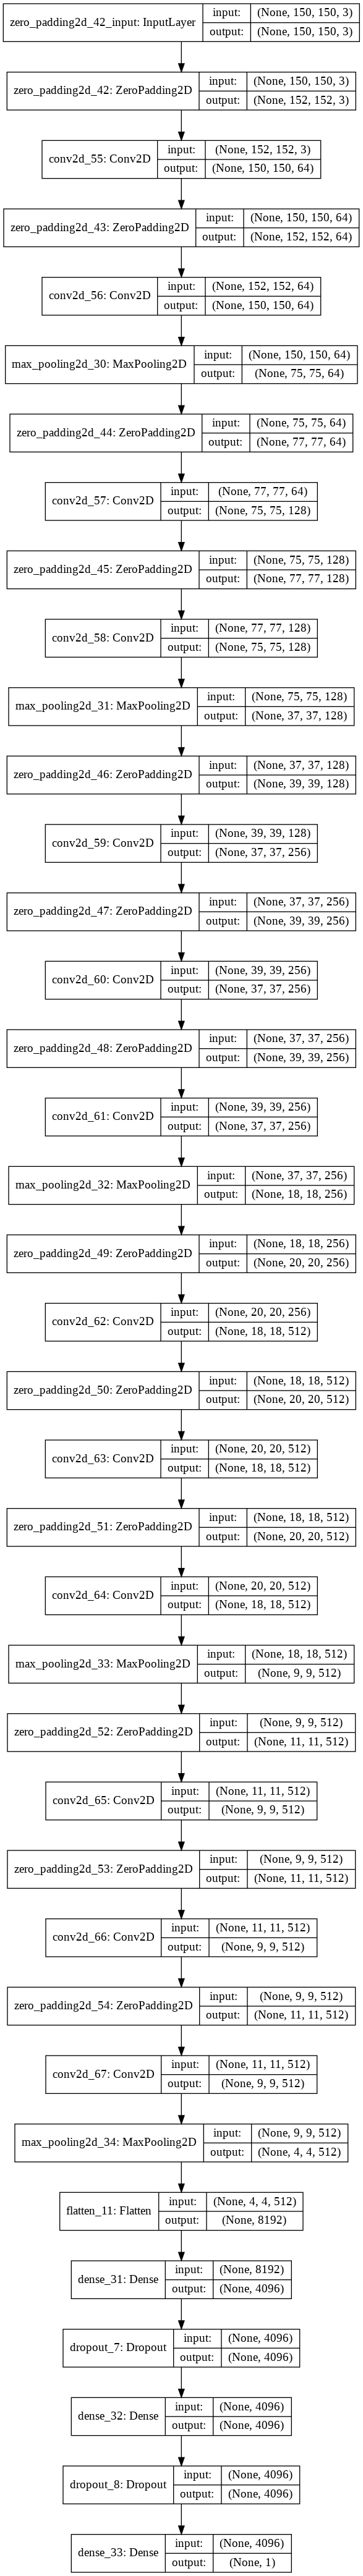

In [39]:
plot_model(model, show_shapes=True, to_file='model_visualization_vgg16.png')

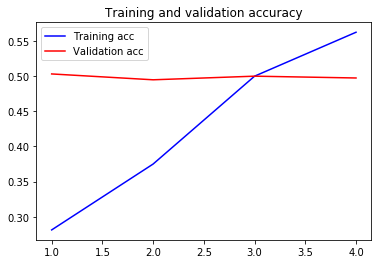

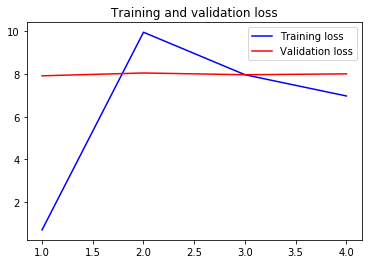

In [40]:
import matplotlib.pyplot as plt
acc = train_history.history['acc']
val_acc = train_history.history['val_acc']
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

LeNet architecture


In [41]:
model = Sequential()
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(units = 120, activation = 'relu'))
model.add(Dense(units = 84, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

print('LeNet model complied!!')

print('starting training....')
train_history = model.fit_generator(generator=train_generator, steps_per_epoch=128,epochs=2,validation_data=validation_generator,validation_steps=50)
print('training finished!!')


LeNet model complied!!
starting training....
Epoch 1/2
128/128 [==============================] - 145s 1s/step - loss: 0.7305 - acc: 0.5732 - val_loss: 0.6625 - val_acc: 0.6136
Epoch 2/2
128/128 [==============================] - 120s 937ms/step - loss: 0.6500 - acc: 0.6536 - val_loss: 0.6172 - val_acc: 0.6476
training finished!!


In [42]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 146, 146, 6)       456       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 73, 73, 6)         0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 69, 69, 16)        2416      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 18496)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 120)               2219640   
_________________________________________________________________
dense_35 (Dense)             (None, 84)              

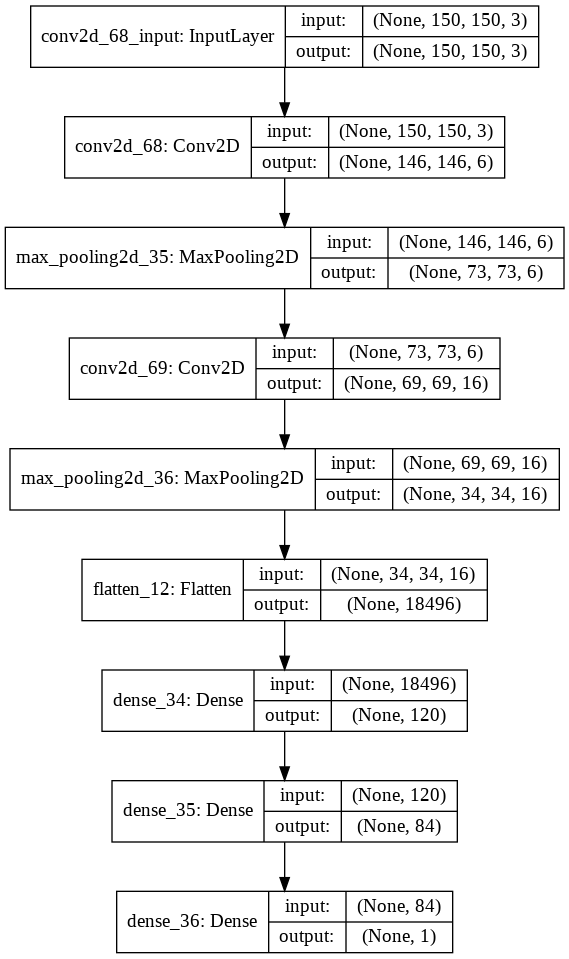

In [43]:
plot_model(model, show_shapes=True, to_file='model_visualization_lenet.png')

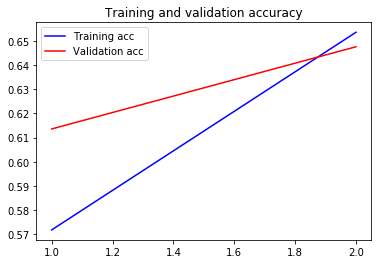

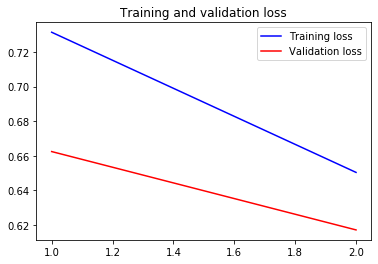

In [44]:
import matplotlib.pyplot as plt
acc = train_history.history['acc']
val_acc = train_history.history['val_acc']
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()